<a href="https://colab.research.google.com/github/piyushrockzz/ExcelR-Projects-/blob/main/Assignment_18_forecasting_Airline_Updated_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [37]:
data=pd.read_excel("/content/Airlines+Data.xlsx")

In [38]:
# Convert 'Month' column to datetime type and set it as the index
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data.set_index('Month', inplace=True)

In [39]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [40]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


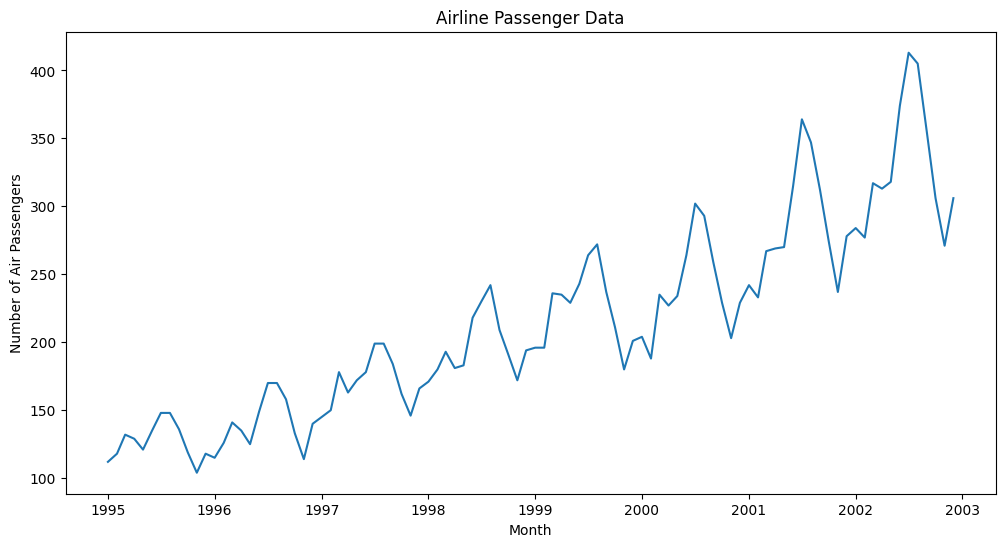

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'])
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Airline Passenger Data')
plt.show()

In [42]:
def perform_stationarity_check(timeseries):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

        # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
      # Perform Dickey-Fuller test
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

    # Log transformation to stabilize variance
    timeseries_log = np.log(timeseries)
    return timeseries_log


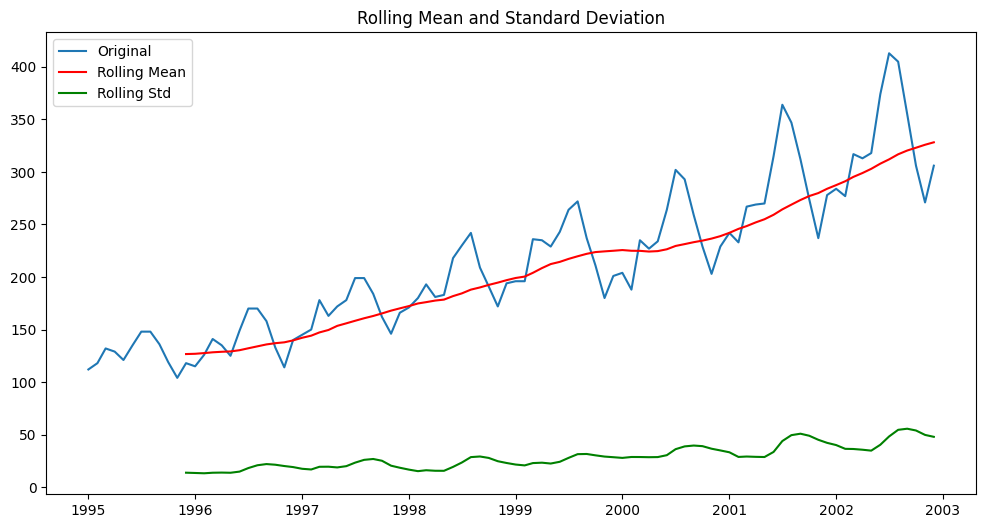

Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Observations     83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [43]:
from statsmodels.tsa.stattools import adfuller

def perform_stationarity_check(timeseries):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

    # Log transformation to stabilize variance
    timeseries_log = np.log(timeseries)
    return timeseries_log

data_log = perform_stationarity_check(data['Passengers'])


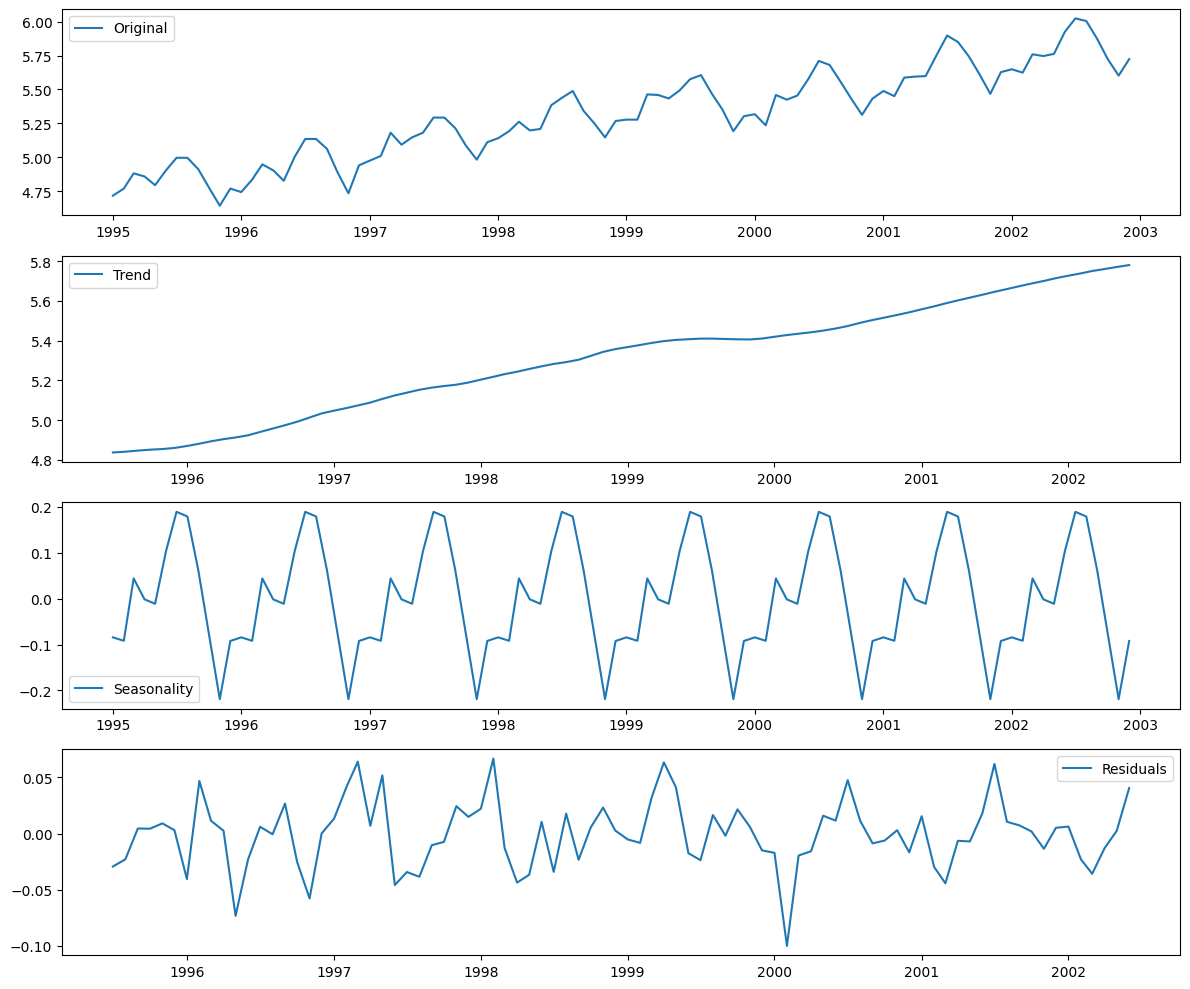

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_log, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


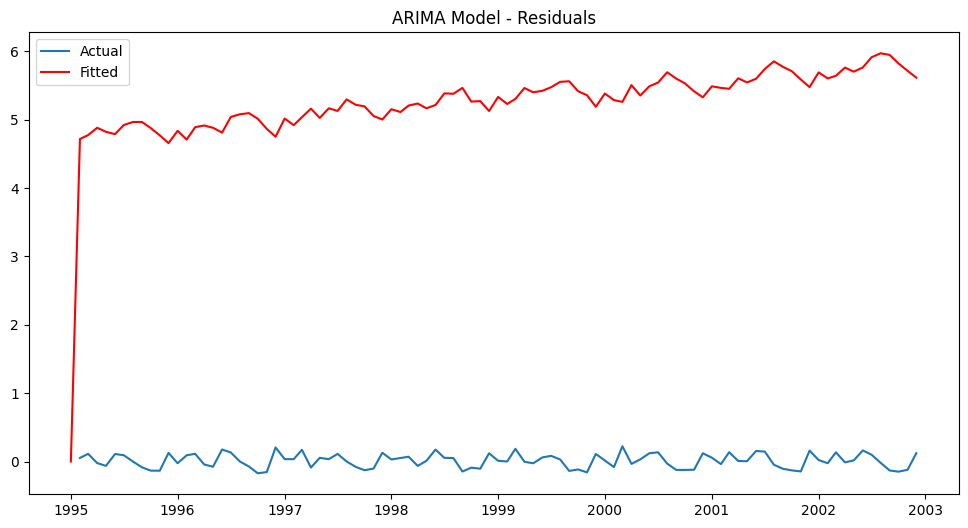

In [35]:
#ARIMA MODELLING
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_log, order=(2, 1, 2))
results = model.fit()

plt.figure(figsize=(12, 6))
plt.plot(data_log.diff().dropna(), label='Actual')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('ARIMA Model - Residuals')
plt.show()

# Convert back to original scale
predictions_log = pd.Series(results.fittedvalues, copy=True)
predictions_cum_sum = predictions_log.cumsum()
predictions_final = np.exp(data_log.iloc[0]) * predictions_cum_sum


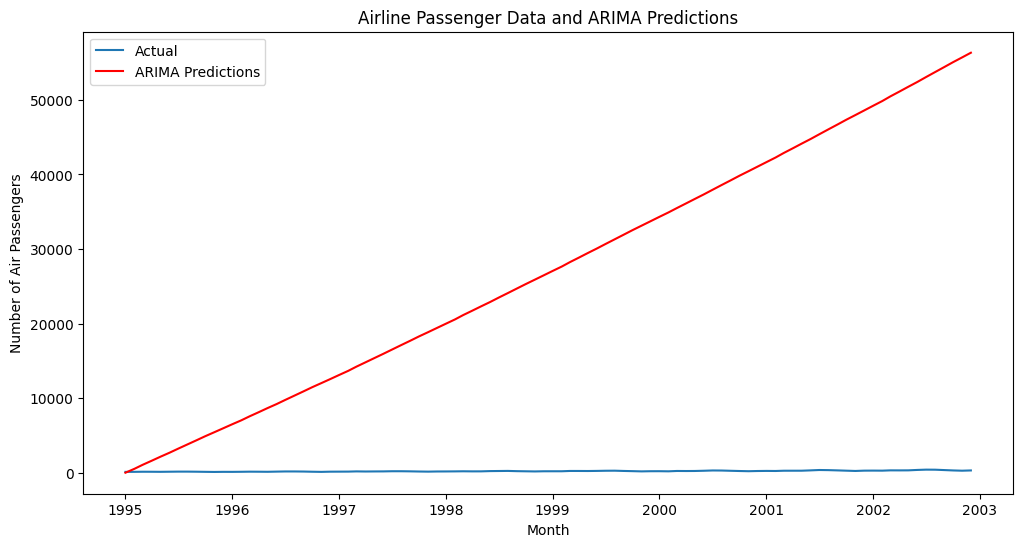

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Actual')
plt.plot(predictions_final, color='red', label='ARIMA Predictions')
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Airline Passenger Data and ARIMA Predictions')
plt.legend()
plt.show()
